In [1]:
# Python
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the npz file
# npz_file_path = "/home/kjell/Documents/Repositories/Soar_EnvGen/wind_fields/run_20240609_224721_buildings/flow_field_data_50.npz"
# npz_file_path = "/home/kjell/Documents/Repositories/Soar_EnvGen/wind_fields/run_20240908_164926_TU_Delft_campus/flow_field_data_100.npz"
npz_file_path = "../wind_fields/run_20241012_223409_random_field_flow_test/flow_field_data_100.npz"
data = np.load(npz_file_path)


In [3]:

# Extract the data
velocity_vectors = data['velocity_vectors']
cell_positions = data['cell_positions']


In [4]:
cell_positions.shape

(296201, 3)

In [5]:
velocity_vectors.shape

(296201, 3)

In [7]:
velocity_vectors[40]

array([ 1.55489e+01,  7.34309e-03, -3.37587e-03])

In [7]:
drone_position = np.array([-34, 0, 42])

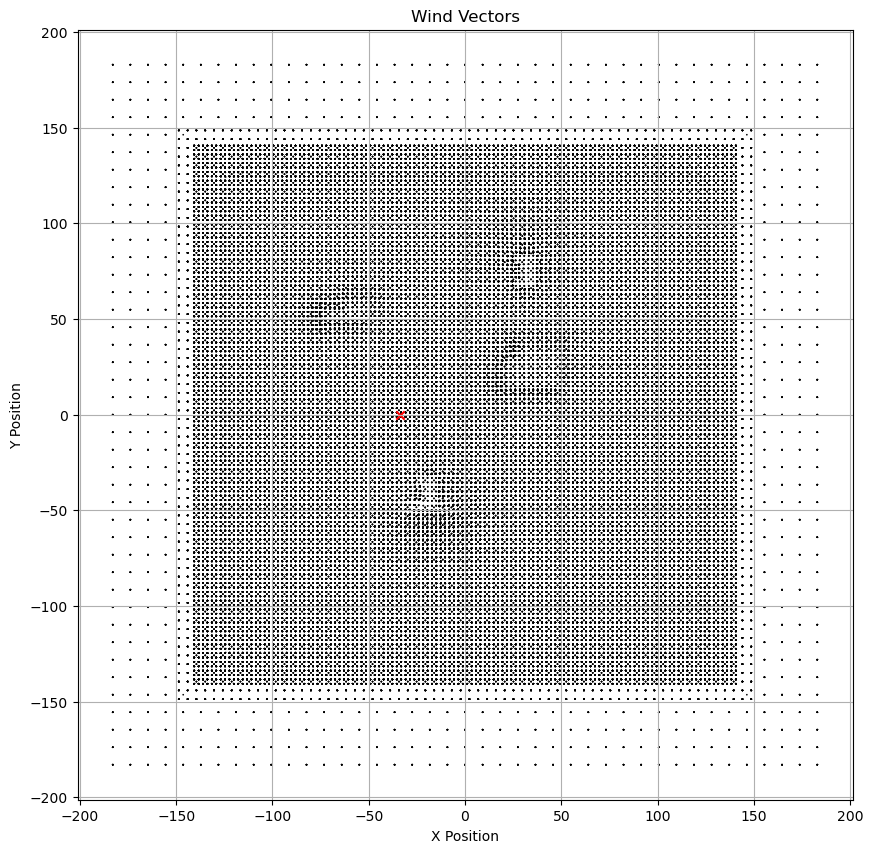

In [8]:

# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 0], cell_positions[:, 1], velocity_vectors[:, 0], velocity_vectors[:, 1])
plt.scatter(drone_position[0], drone_position[1], c='r', marker='x', label='Drone Position')
plt.title('Wind Vectors')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()



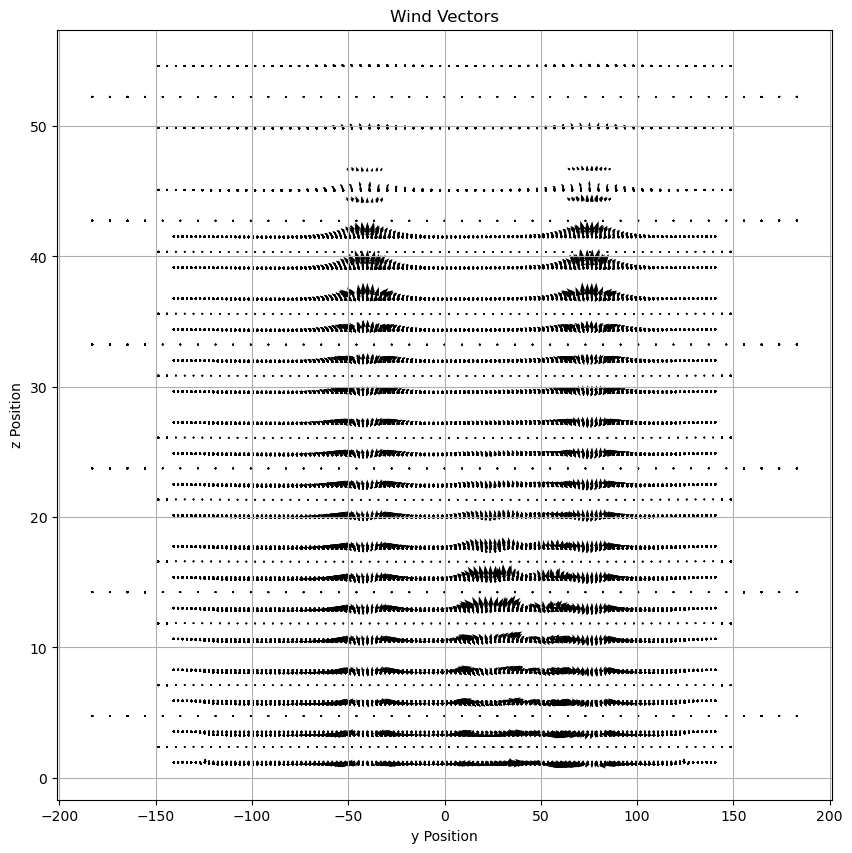

In [9]:


# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 1], cell_positions[:, 2], velocity_vectors[:, 1], velocity_vectors[:, 2])
plt.title('Wind Vectors')
plt.xlabel('y Position')
plt.ylabel('z Position')
plt.grid(True)
plt.show()



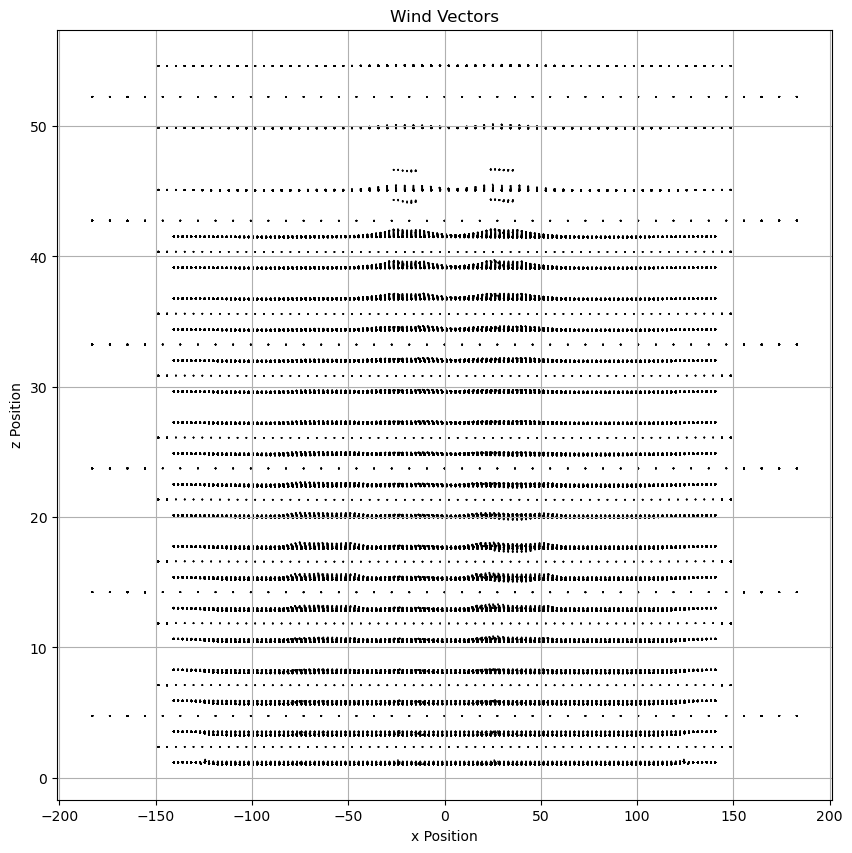

In [10]:


# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 0], cell_positions[:, 2], velocity_vectors[:, 0], velocity_vectors[:, 2])
plt.title('Wind Vectors')
plt.xlabel('x Position')
plt.ylabel('z Position')
plt.grid(True)
plt.show()



In [11]:
print(cell_positions[100000])
print(100000/len(cell_positions))
print(type(cell_positions[0][0]))
print(cell_positions[100000][0])

[ -19.4364 -110.901    10.4256]
0.3376085833606234
<class 'numpy.float64'>
-19.4364


In [12]:
from scipy.spatial import KDTree

In [16]:
# Step 1: Build a KD-Tree from cell positions
drone_position = np.array([-34, 0, 42])
drone_position = np.array([-50, 48, 15]) # Back of building where flow is negative, this means updraft is on other side
drone_position = np.array([19.8,16, 15]) # IN front of building where flow is strong
kd_tree = KDTree(cell_positions)


# drone_position = [363.051 , 508.667 , -28.1428]
# Step 2: Define the drone's current position
# drone_position = np.array([300, 232, 34])


# Step 3: Query the KD-Tree to find the nearest neighbor(s)
# Here, k=1 will give you the closest point; use k=2 or more if you want multiple neighbors for interpolation
print("Starting query")
distance, index = kd_tree.query(drone_position, k=10)
print("Query done")
# Step 4: Retrieve the closest cell position and corresponding wind vector
closest_position = cell_positions[index]
print(closest_position)
closest_wind_vector = velocity_vectors[index]
print(closest_wind_vector)

Starting query
Query done
[[21.0336 17.0648 15.3417]
 [18.5609 17.0232 15.4841]
 [21.1945 14.8903 15.4773]
 [18.5044 14.7742 15.5786]
 [18.5869 17.0932 13.0713]
 [18.4578 14.9128 13.0366]
 [21.0522 17.0805 17.8166]
 [18.6083 17.0655 17.9607]
 [21.1096 14.7747 17.9328]
 [18.6226 14.7547 18.0138]]
[[17.0695  -2.48312  7.51921]
 [15.6743  -3.84199 10.0874 ]
 [17.5358  -2.83078  6.33962]
 [16.399   -5.30986  8.15526]
 [ 7.5008  -5.20549 10.5592 ]
 [ 9.58821 -9.08021  8.43721]
 [18.0317  -2.67279  4.03328]
 [17.16    -2.59547  5.24875]
 [18.2139  -3.05105  3.04329]
 [17.2685  -3.09346  4.27075]]


In [52]:
print("Starting query")
distance, index = kd_tree.query(drone_position, k=4)
print("Query done")
# Step 4: Retrieve the closest cell position and corresponding wind vector
closest_position = cell_positions[index]
print(closest_position)

Starting query
Query done
[[107.999  108.      32.9887]
 [107.999  108.      42.4184]
 [107.999  108.      23.5611]
 [107.999  108.      51.8498]]


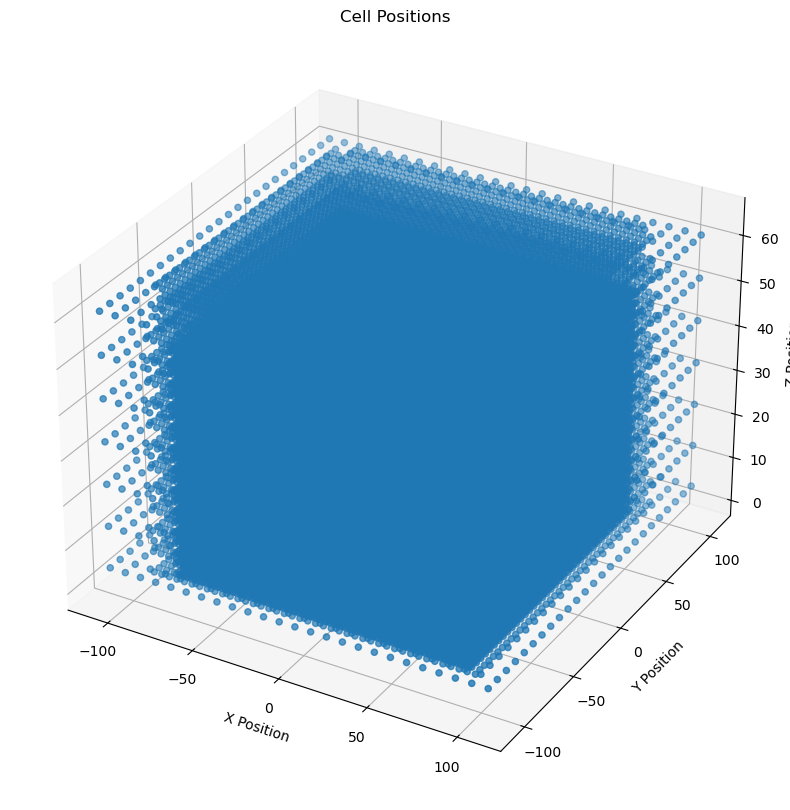

In [53]:
# Python
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Assuming cell_positions is a 2D array with 3 columns for x, y, and z coordinates
ax.scatter(cell_positions[:, 0], cell_positions[:, 1], cell_positions[:, 2])

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.title('Cell Positions')
plt.show()